In [2]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/kl_coeff/agents')

100%|██████████| 16/16 [00:02<00:00,  6.20it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [4]:
games =  ["Walker2d-v2", "Hopper-v2", "HalfCheetah-v2", "Humanoid-v2"]
code_level_opts = {
      "kl_penalty_direction": ["new_to_old"],
      #'clip_advantages': [1e8],
      #'norm_rewards': ['none', 'returns'],
      #'anneal_lr': [False, True],
      #'value_clipping': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

In [6]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [6]:
def filter_opts(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

# Plot mean rewards

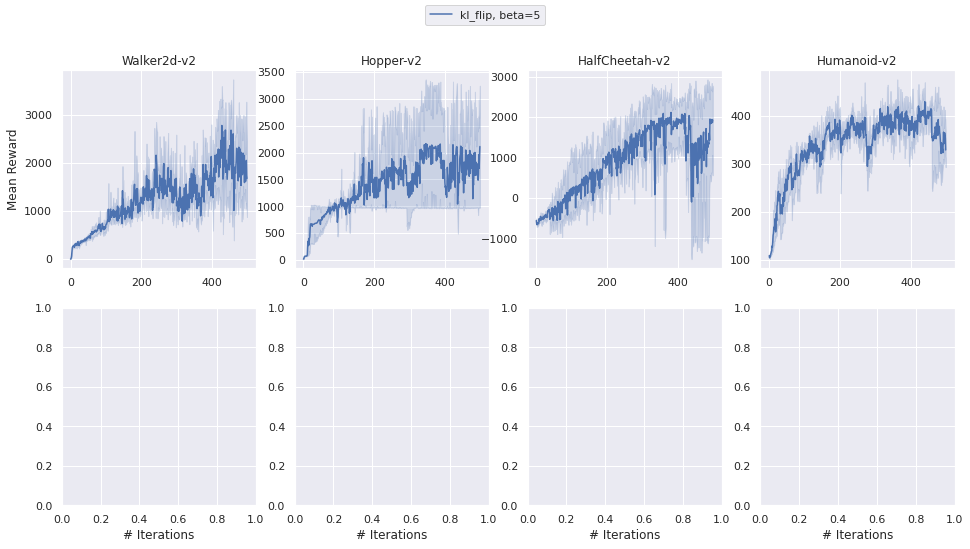

In [11]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_opts(opt, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label='kl_flip, beta=5', legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

In [53]:
filt = filter_opts(constraints_heldout, ppo_lr_adam=3e-4, sign_advantages=False, clip=True, kl_penalty=False)

In [54]:
filt.head()

,avg_kl_old_to_new,avg_kl_new_to_old,avg_ratio,avg_rat_minus_one_sq,max_ratio,opt_step,exp_id,game,clip,kl_penalty,ppo_lr_adam,sign_advantages
50,0.014286,0.014123,1.002568,0.029965,2.080559,0,7ff5ee99-ff01-413a-a021-071435624549,Walker2d-v2,True,False,0.0003,False
51,0.011570,0.011520,0.997578,0.024201,2.057647,10,7ff5ee99-ff01-413a-a021-071435624549,Walker2d-v2,True,False,0.0003,False
52,0.009998,0.009852,0.999511,0.019199,1.917814,20,7ff5ee99-ff01-413a-a021-071435624549,Walker2d-v2,True,False,0.0003,False
53,0.012904,0.012677,1.001194,0.025534,1.879576,30,7ff5ee99-ff01-413a-a021-071435624549,Walker2d-v2,True,False,0.0003,False
54,0.011257,0.011084,0.999569,0.022190,1.837460,40,7ff5ee99-ff01-413a-a021-071435624549,Walker2d-v2,True,False,0.0003,False


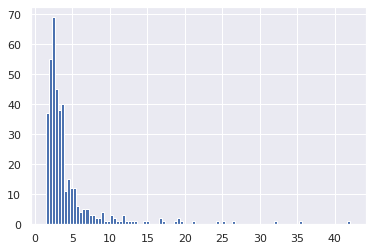

In [57]:
plt.hist(filt.max_ratio, bins=100)
plt.show()

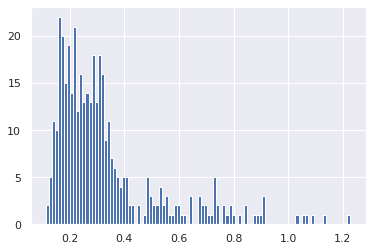

In [59]:
plt.hist(np.sqrt(filt.avg_rat_minus_one_sq), bins=100)
plt.show()

In [81]:
filt = filter_opts(constraints_heldout, ppo_lr_adam=3e-4, sign_advantages=False,
                   clip=False, kl_penalty=True, kl_penalty_direction='old_to_new')

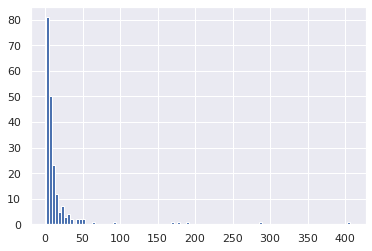

In [82]:
plt.hist(filt.max_ratio, bins=100)
plt.show()

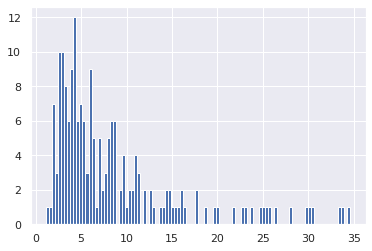

In [83]:
plt.hist(filt[filt.max_ratio < 40].max_ratio, bins=100)
plt.show()

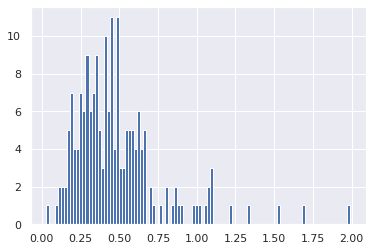

In [84]:
plt.hist(np.sqrt(filt[filt.max_ratio < 40].avg_rat_minus_one_sq), bins=100)
plt.show()

In [75]:
filt = filter_opts(constraints_heldout, ppo_lr_adam=3e-4, sign_advantages=False,
                   clip=False, kl_penalty=True, kl_penalty_direction='new_to_old')

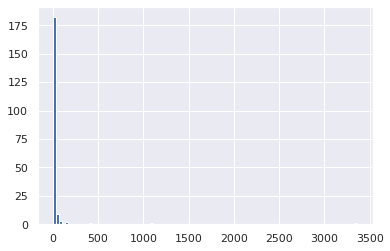

In [76]:
plt.hist(filt.max_ratio, bins=100)
plt.show()

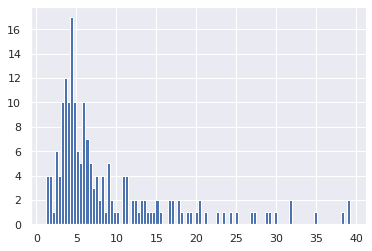

In [77]:
plt.hist(filt[filt.max_ratio < 40].max_ratio, bins=100)
plt.show()

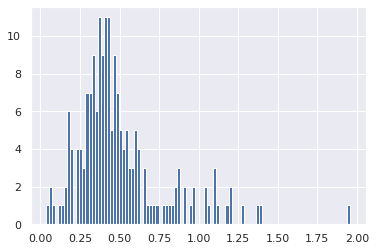

In [78]:
plt.hist(np.sqrt(filt[filt.max_ratio < 40].avg_rat_minus_one_sq), bins=100)
plt.show()

In [3]:
r = readers.CollectionReader('../src/kl_coeff_2/agents')

100%|██████████| 40/40 [00:03<00:00, 10.84it/s]


In [11]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#constraints = r.df('paper_constraints_train')
#constraints_heldout = r.df('paper_constraints_heldout')

In [12]:
games =  ["Walker2d-v2", "Hopper-v2", "HalfCheetah-v2", "Humanoid-v2"]
code_level_opts = {
      "kl_penalty_coeff": [2, 4],
      "kl_penalty_direction": ["new_to_old"],
      #'clip_advantages': [1e8],
      #'norm_rewards': ['none', 'returns'],
      #'anneal_lr': [False, True],
      #'value_clipping': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

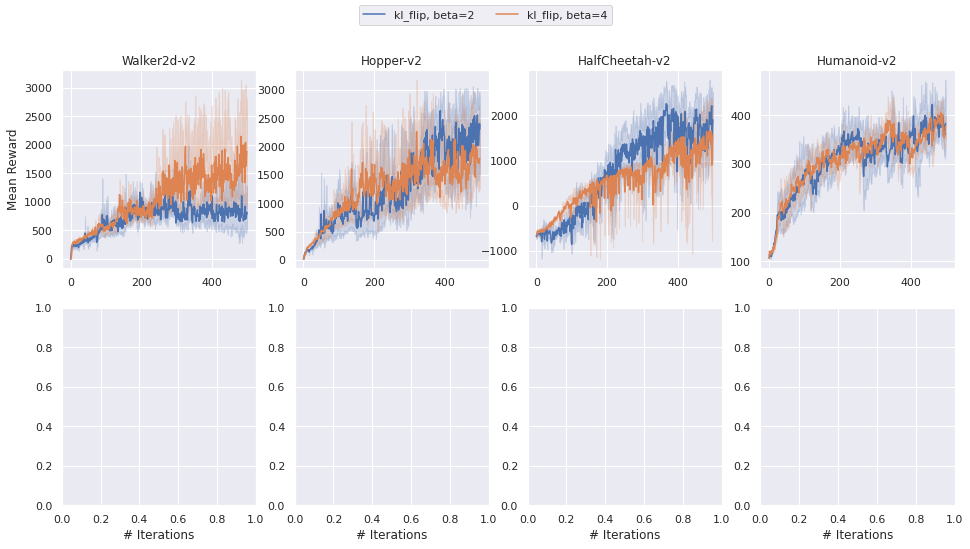

In [14]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    filt = filter_opts(opt, game=g, kl_penalty_coeff=2)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label='kl_flip, beta=2', legend=False)
    filt = filter_opts(opt, game=g, kl_penalty_coeff=4)
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label='kl_flip, beta=4', legend=False)
    ax.flatten()[j].set_title(g)

for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

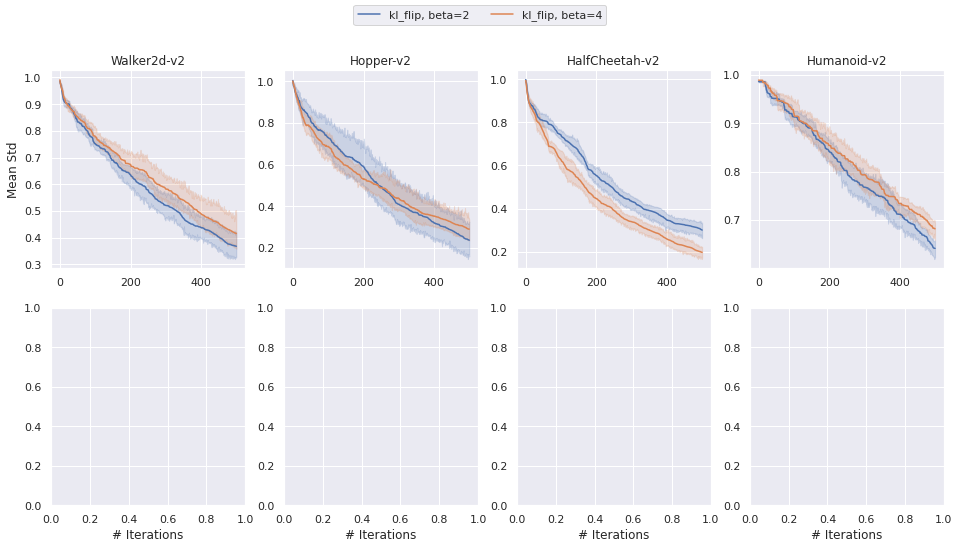

In [15]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    filt = filter_opts(opt, game=g, kl_penalty_coeff=2)
    sns.lineplot(filt.opt_step, filt.mean_std, n_boot=100,
                 ax=ax.flatten()[j], label='kl_flip, beta=2', legend=False)
    filt = filter_opts(opt, game=g, kl_penalty_coeff=4)
    sns.lineplot(filt.opt_step, filt.mean_std, n_boot=100,
                 ax=ax.flatten()[j], label='kl_flip, beta=4', legend=False)
    ax.flatten()[j].set_title(g)

for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Std')
ax[1][0].set_xlabel('Mean Std')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()